# Genes shared by all diplomonads

excluding fornicata

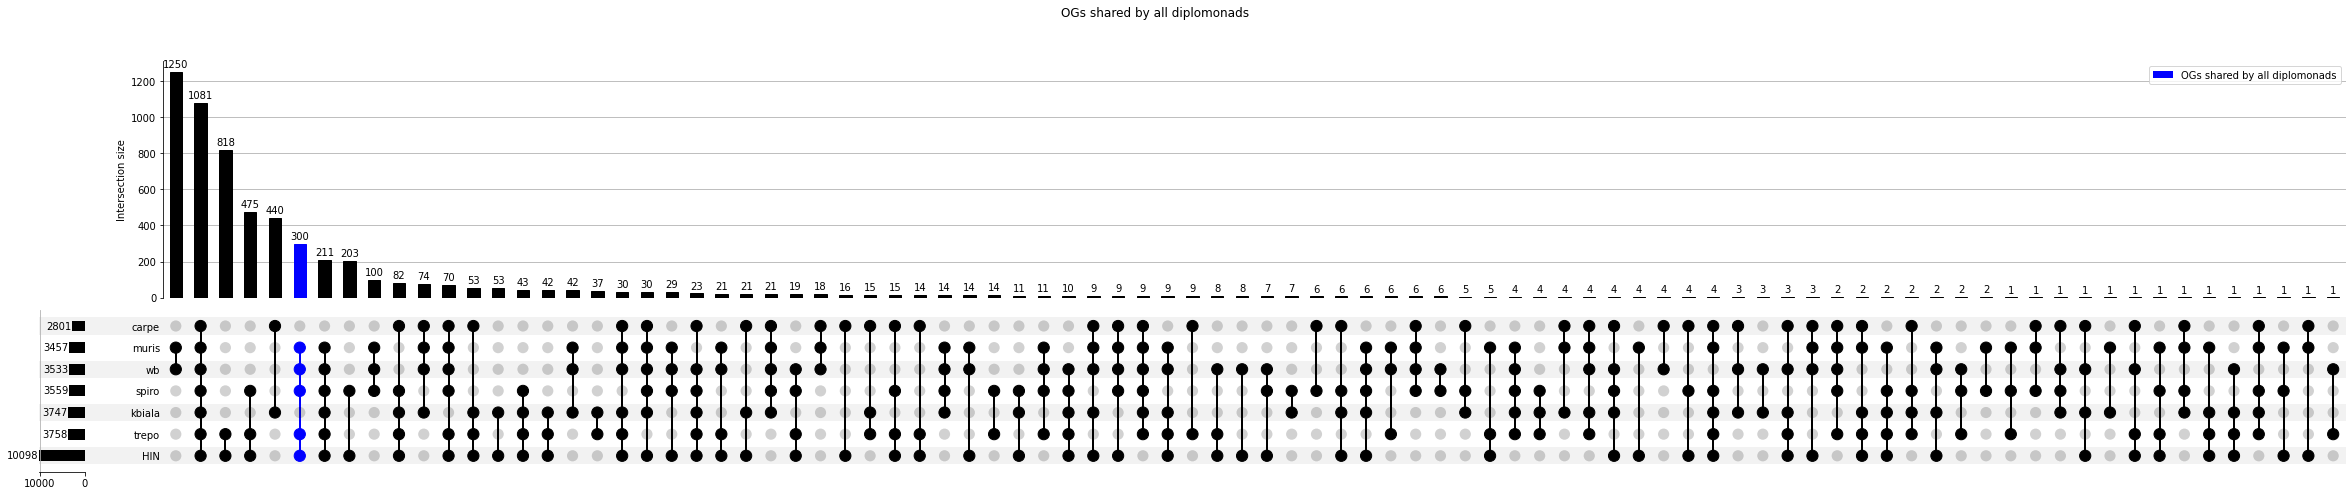

In [65]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt
from matplotlib import cm

"OG with at least two genes"
df_count = pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df_count = df_count.set_index("Orthogroup").sort_values(by="Total", ascending=False)
df_count.loc[df_count["Total"] > 1, "Type"] = "OG"

"Upset plot for only OG, singletons are excluded"
df_stack_cn = df_count.set_index(df_count.HIN >= 1).\
    set_index(df_count.spiro >= 1, append=True).\
    set_index(df_count.wb >= 1, append=True).\
    set_index(df_count.muris >= 1, append=True).\
    set_index(df_count.trepo >= 1, append=True).\
    set_index(df_count.kbiala >= 1, append=True).\
    set_index(df_count.carpe >= 1, append=True)

upset = UpSet(df_stack_cn,
              intersection_plot_elements=10,
              min_degree=2,
              show_counts=True,
              sort_categories_by="cardinality",
              sort_by="cardinality")

upset.style_subsets(absent=["kbiala", "carpe"],
                    min_degree=5,
                    facecolor="blue",
                    label="OGs shared by all diplomonads")

upset.plot()
plt.suptitle("OGs shared by all diplomonads")
plt.show()

## Extract genes from OGs


In [62]:
"OG shared by all diplomonads"

df=pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df=df[["Orthogroup","HIN", "trepo", "spiro", "wb", "muris", "kbiala", "carpe", "Total"]]

og_diplo=df[(df.iloc[:,[1,2,3,4,5]] >=1).all(1) & (df.iloc[:,[6,7]] ==0).all(1)]

print("Number of OGs= ", len(og_diplo["Orthogroup"]))
print("Total HIN genes =", og_diplo["HIN"].sum())
print("Total trepo genes =", og_diplo["trepo"].sum())
print("Total spiro genes =", og_diplo["spiro"].sum())
print("Total wb genes =", og_diplo["wb"].sum())
print("Total muris genes =", og_diplo["muris"].sum())

og_diplo.head()

Number of OGs=  300
Total HIN genes = 1274
Total trepo genes = 404
Total spiro genes = 374
Total wb genes = 333
Total muris genes = 325


,Orthogroup,HIN,trepo,spiro,wb,muris,kbiala,carpe,Total
86,OG0000086,55,26,12,2,2,0,0,97
195,OG0000195,32,11,7,2,2,0,0,54
378,OG0000378,27,2,2,1,1,0,0,33
406,OG0000406,25,2,2,1,1,0,0,31
502,OG0000502,6,2,6,6,6,0,0,26


In [66]:
"OG gene list"
OG_gene_list = pd.read_csv('/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.txt', header=None, dtype=str, delim_whitespace=True)
OG_gene_list = OG_gene_list.apply(lambda x: x.str.replace(":", ""))

"extract proteins from OG"
def extract_prot(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").set_index(0)
    return df.T

extract_prot(og_diplo).head()

,OG0000086,OG0000195,OG0000378,OG0000406,OG0000502,OG0000506,OG0000543,OG0000578,OG0000674,OG0000883,...,OG0004920,OG0004927,OG0004928,OG0004930,OG0004939,OG0004963,OG0004964,OG0004967,OG0006008,OG0006077
1,GL50803_13231,GL50803_35341,GL50803_16599,GL50803_61276,GL50803_11209,GL50803_61550,GL50803_10330,GL50803_104250,GL50803_16006,GL50803_678,...,GL50803_5603,GL50803_8604,GL50803_11557,GL50803_11771,GL50803_16192,GL50803_14054,GL50803_8135,GL50803_17280,GL50803_9427,GL50803_16926
2,GL50803_16411,GL50803_37350,GMRT_15869,GMRT_14239,GL50803_137680,GMRT_11522,GL50803_113038,GL50803_3910,GMRT_13946,GMRT_16347,...,GMRT_10909,GMRT_12712,GMRT_15190,GMRT_15517,GMRT_13762,GMRT_14394,GMRT_13346,GMRT_14388,GMRT_13197,GMRT_10817
3,GMRT_13622,GMRT_13162,HIN_002795,HIN_003706,GL50803_17607,HIN_009664,GL50803_114815,GMRT_15366,HIN_020958,HIN_001226,...,HIN_065946,HIN_066682,HIN_066689,HIN_066967,HIN_070252,HIN_090757,HIN_090772,HIN_093020,HIN_059843,HIN_097892
4,GMRT_14177,GMRT_13237,HIN_003720,HIN_019755,GL50803_3099,HIN_009677,GL50803_14573,HIN_001514,HIN_020961,HIN_001229,...,HIN_070852,HIN_078130,HIN_078124,HIN_094476,HIN_093955,HIN_093023,HIN_093860,SS50377_24151,SS50377_21191,SS50377_25538
5,HIN_002761,HIN_004709,HIN_003751,HIN_019756,GL50803_3169,HIN_009690,GL50803_16322,HIN_002146,HIN_020964,HIN_013098,...,SS50377_23242,SS50377_21232,SS50377_23334,SS50377_23592,SS50377_28224,SS50377_25390,SS50377_28335,SS50377_24154,TPC1_11163,TPC1_16186
